Question 1 · Programmatically download and load into your favorite analytical tool the trip data for September 2015.Report how many rows and columns of data you have loaded.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('green.csv')

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
df.shape

(1494926, 21)

Answer 1. 1494926 rows and 21 columns

Question 2 Plot a histogram of the number of the trip distance ("Trip Distance").  Report any structure you find and any hypotheses you have about that structure.

In [5]:
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [7]:
df['Trip_distance'].head()

0    0.00
1    0.00
2    0.59
3    0.74
4    0.61
Name: Trip_distance, dtype: float64

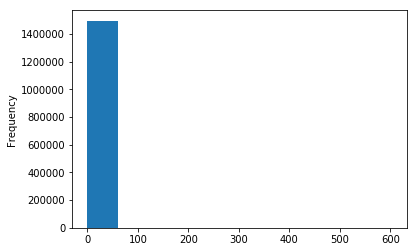

In [8]:
df.Trip_distance.plot(kind='hist')

In [9]:
df.Trip_distance.value_counts().head()

0.0    20592
1.0    16735
0.9    16699
0.8    16152
1.1    16070
Name: Trip_distance, dtype: int64

In [10]:
df.Trip_distance.describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

In [11]:
df.Trip_distance.min()

0.0

In [12]:
df.Trip_distance.max()

603.1

In [13]:
df.Trip_distance.median()

1.98

In [14]:
td=df[df.Trip_distance<=20]

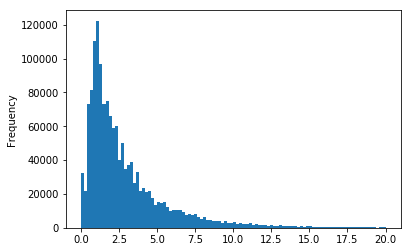

In [15]:
td.Trip_distance.plot(kind='hist',bins=100) #bins

Question 3 · Report mean and median trip distance grouped by hour of day. · We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [16]:
from datetime import datetime
import numpy as np

In [17]:
df['pickup'] = df['lpep_pickup_datetime']
df['pickup'].head()

0    2015-09-01 00:02:34
1    2015-09-01 00:04:20
2    2015-09-01 00:01:50
3    2015-09-01 00:02:36
4    2015-09-01 00:00:14
Name: pickup, dtype: object

In [18]:
df['pickup'] = df['lpep_pickup_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['pickup'].head()

0   2015-09-01 00:02:34
1   2015-09-01 00:04:20
2   2015-09-01 00:01:50
3   2015-09-01 00:02:36
4   2015-09-01 00:00:14
Name: pickup, dtype: datetime64[ns]

In [19]:
df['pickup_hour'] = df['pickup'].apply(lambda x: x.hour)
df['pickup_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: pickup_hour, dtype: int64

In [20]:
df['dropoff'] = df['Lpep_dropoff_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff_hour'] = df['dropoff'].apply(lambda x: x.hour)
df['dropoff_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: dropoff_hour, dtype: int64

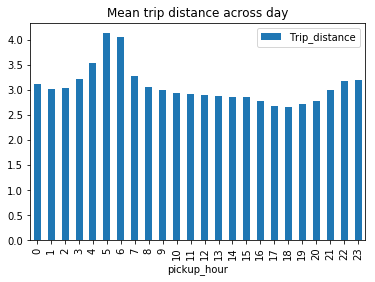

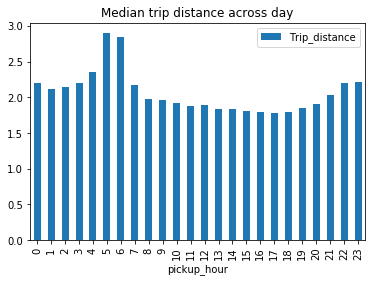

In [21]:
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean trip distance across day')
plt.show()
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median trip distance across day')
plt.show()

In [22]:
def which_nyairport(row):
    if (
        ((row['Pickup_longitude'] < -73.750296) & (row['Pickup_longitude'] > -73.821884) &
       (row['Pickup_latitude'] < 40.666467) & (row['Pickup_latitude']>40.646677)) | 
        (
       (row['Dropoff_longitude'] < -73.750296) & (row['Dropoff_longitude'] > -73.821884) &
       (row['Dropoff_latitude'] < 40.666467) & (row['Dropoff_latitude']>40.646677)) ):
        
        return 'JFK'
    if (
        ((row['Pickup_longitude'] < -73.865387) & (row['Pickup_longitude'] > -73.884547) &
       (row['Pickup_latitude'] < 40.773098) & (row['Pickup_latitude']>40.767550)) | 
        (
       (row['Dropoff_longitude'] < -73.865387) & (row['Dropoff_longitude'] > -73.884547) &
       (row['Dropoff_latitude'] < 40.773098) & (row['Dropoff_latitude']>40.767550)) ):
        
        return 'LAG'
    else:
        return 'NOT'

In [ ]:
airport = [None]*df.shape[0]
for index, row in df.iterrows():
    if index%1000 == 0:
        print(index)
    airport[index] = which_nyairport(row)
    np.save('aiport_array.npy', airport)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
airport = np.load('aiport_array.npy')

Question 4 · Build a derived variable for tip as a percentage of the total fare. · Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

